In [4]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
     --------------------------------------- 41.2/41.2 MB 23.4 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
enschede = rasterio.open("./data/Enschede.tif")
img = enschede.read()
img = img[0:12,:,:] # 12 spectral bands
img = np.transpose(img, [1, 2, 0])
print(img.shape)

(110, 120, 12)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..5.0].


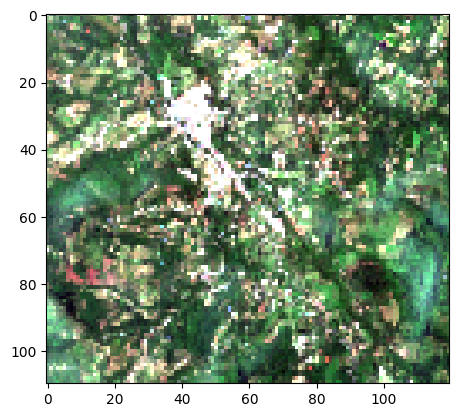

In [19]:
def MyNormalize(img_i,sigma):
    nr,nc,nb = img_i.shape
    img_n = np.zeros(shape=(nr,nc,nb))
    for i in range(0,nb):
        one_band = img_i[:,:,i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
        img_n[:,:,i] = sigma*one_band
    return img_n
img_rgb = img[:,:,[3,2,1]]
plt.imshow(MyNormalize(img_rgb,5))

In [46]:
print(img_rgb.shape)
img_2d = img_rgb.reshape(-1, 3)
print(img_2d.shape)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(img_2d)
labels_2d = labels.reshape(img_rgb.shape[0], img_rgb.shape[1])

(110, 120, 3)
(13200, 3)


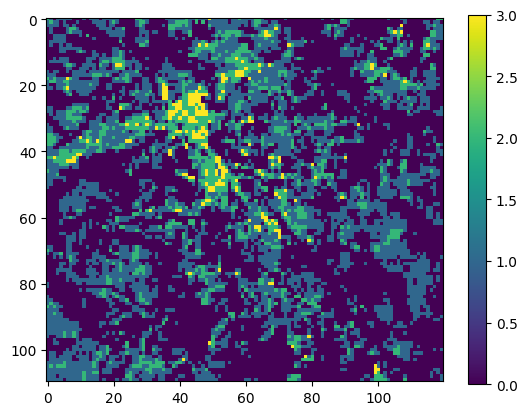

In [47]:
plt.imshow(labels_2d, cmap='viridis')  
plt.colorbar()
plt.show()